In [2]:
import pandas as pd
import pickle
# SKLEARN SVM PORTION

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF, DotProduct, Matern
import numpy as np
from IPython.display import clear_output, display, HTML, Javascript

In [3]:
df = pd.read_csv('ResultsData_080623.csv') 
df = df.rename(columns={"Unnamed: 0": "Index"})

In [5]:
df.head()

,Index,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,original_label,img_path,metadata,bboxs,m1,m2,m3,m4,m5,m6
0,40,1.279082,2.163162,1.387326,1.021025,2.144935,1.011913,2.294550,2.627403,4.511601,...,person,../../data/val/YFCC100M/v_9c29a4c4e03790d16925...,"{'segmentation': [[224, 2, 640, 2, 640, 480, 2...","(224.0, 2.0, 640.0, 480.0)",person,person,person,person,person,person
1,41,0.299634,0.173886,0.229507,0.412398,1.746415,0.655757,0.477212,0.823943,1.453786,...,spatula,../../data/val/YFCC100M/v_9c29a4c4e03790d16925...,"{'segmentation': [[233, 203, 269, 203, 269, 44...","(233.0, 203.0, 269.0, 446.0)",person,person,not_person,not_person,not_person,not_person
2,42,1.281126,1.919473,0.949052,0.948605,1.785091,1.158464,2.384823,2.453316,4.210309,...,person,../../data/val/YFCC100M/v_9c29a4c4e03790d16925...,"{'segmentation': [[205, 2, 640, 2, 640, 480, 2...","(205.0, 2.0, 640.0, 480.0)",person,person,person,person,person,person
3,43,0.239554,0.143336,0.363114,0.386323,1.561549,0.498190,0.261052,0.869688,1.246313,...,spatula,../../data/val/YFCC100M/v_9c29a4c4e03790d16925...,"{'segmentation': [[213, 189, 259, 189, 259, 42...","(213.0, 189.0, 259.0, 429.0)",person,person,not_person,not_person,not_person,not_person
4,44,0.906112,2.327980,1.081830,0.876156,1.779853,0.932696,2.281990,2.790590,4.259732,...,person,../../data/val/YFCC100M/v_9c29a4c4e03790d16925...,"{'segmentation': [[226, 2, 640, 2, 640, 480, 2...","(226.0, 2.0, 640.0, 480.0)",person,person,person,person,person,person


# Confusion Matrix

In [6]:
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.metrics import confusion_matrix
%matplotlib inline

## M1

In [7]:
m1 = df['m1']
y = df['label']

In [8]:
print(classification_report(y, m1))

              precision    recall  f1-score   support

  not_person       0.88      0.91      0.89     18142
      person       0.82      0.77      0.79      9790

    accuracy                           0.86     27932
   macro avg       0.85      0.84      0.84     27932
weighted avg       0.86      0.86      0.86     27932



In [12]:
report = classification_report(y, m1, output_dict=True)
print(report)

{'not_person': {'precision': 0.8806401541508323, 'recall': 0.9069011134384302, 'f1-score': 0.8935777325186695, 'support': 18142}, 'person': {'precision': 0.817385663314953, 'recall': 0.7722165474974464, 'f1-score': 0.794159357109092, 'support': 9790}, 'accuracy': 0.8596949735070887, 'macro avg': {'precision': 0.8490129087328926, 'recall': 0.8395588304679382, 'f1-score': 0.8438685448138807, 'support': 27932}, 'weighted avg': {'precision': 0.8584698310345765, 'recall': 0.8596949735070887, 'f1-score': 0.858732182781459, 'support': 27932}}


In [11]:
print('accuracy',report['accuracy'])

0.8596949735070887


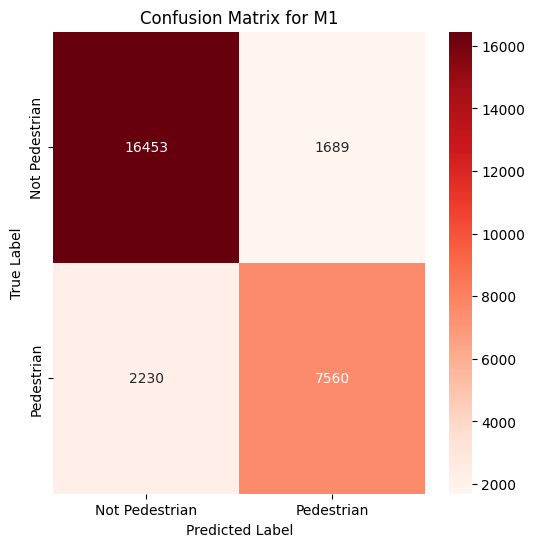

In [7]:
cm = confusion_matrix(y, m1)
# Define the class labels
class_labels = ["Not Pedestrian", "Pedestrian"]

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=class_labels, yticklabels=class_labels)

# Add labels, title, and axis ticks
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for M1")
plt.xticks(np.arange(len(class_labels)) + 0.5, class_labels)
plt.yticks(np.arange(len(class_labels)) + 0.5, class_labels)

# Show the plot
plt.show()

## M2

In [14]:
m2 = df['m2']

In [15]:
print(classification_report(y, m2))

              precision    recall  f1-score   support

  not_person       0.90      0.91      0.90     18142
      person       0.83      0.81      0.82      9790

    accuracy                           0.87     27932
   macro avg       0.86      0.86      0.86     27932
weighted avg       0.87      0.87      0.87     27932



In [16]:
report = classification_report(y, m2, output_dict=True)
print(report)

{'not_person': {'precision': 0.8977562883685555, 'recall': 0.9108698048726711, 'f1-score': 0.9042655065802074, 'support': 18142}, 'person': {'precision': 0.8302362204724409, 'recall': 0.8077630234933606, 'f1-score': 0.8188454568987833, 'support': 9790}, 'accuracy': 0.8747314907632823, 'macro avg': {'precision': 0.8639962544204982, 'recall': 0.8593164141830159, 'f1-score': 0.8615554817394954, 'support': 27932}, 'weighted avg': {'precision': 0.8740909058430306, 'recall': 0.8747314907632823, 'f1-score': 0.8743262868186027, 'support': 27932}}


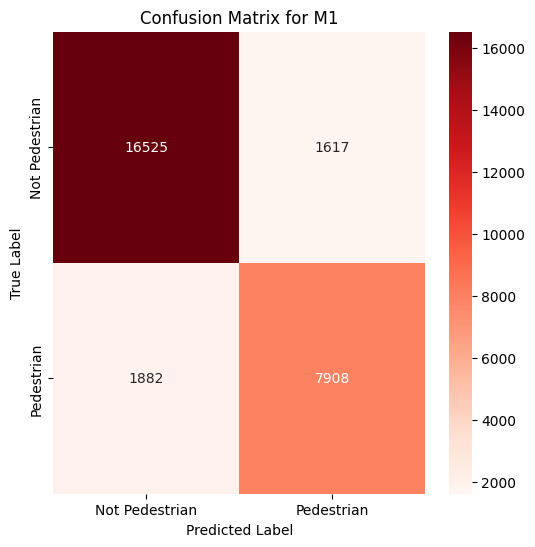

In [10]:
cm = confusion_matrix(y, m2)
# Define the class labels
class_labels = ["Not Pedestrian", "Pedestrian"]

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=class_labels, yticklabels=class_labels)

# Add labels, title, and axis ticks
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for M1")
plt.xticks(np.arange(len(class_labels)) + 0.5, class_labels)
plt.yticks(np.arange(len(class_labels)) + 0.5, class_labels)

# Show the plot
plt.show()

## M3

In [17]:
m3 = df['m3']

In [18]:
print(classification_report(y, m3))

              precision    recall  f1-score   support

  not_person       0.94      0.95      0.94     18142
      person       0.90      0.89      0.90      9790

    accuracy                           0.93     27932
   macro avg       0.92      0.92      0.92     27932
weighted avg       0.93      0.93      0.93     27932



In [19]:
report = classification_report(y, m3, output_dict=True)
print(report)

{'not_person': {'precision': 0.9403948159895007, 'recall': 0.947910924925587, 'f1-score': 0.9441379121029948, 'support': 18142}, 'person': {'precision': 0.9020217729393468, 'recall': 0.8886618998978549, 'f1-score': 0.8952919989709287, 'support': 9790}, 'accuracy': 0.9271444937705857, 'macro avg': {'precision': 0.9212082944644238, 'recall': 0.9182864124117209, 'f1-score': 0.9197149555369617, 'support': 27932}, 'weighted avg': {'precision': 0.9269452924515869, 'recall': 0.9271444937705857, 'f1-score': 0.9270177098416842, 'support': 27932}}


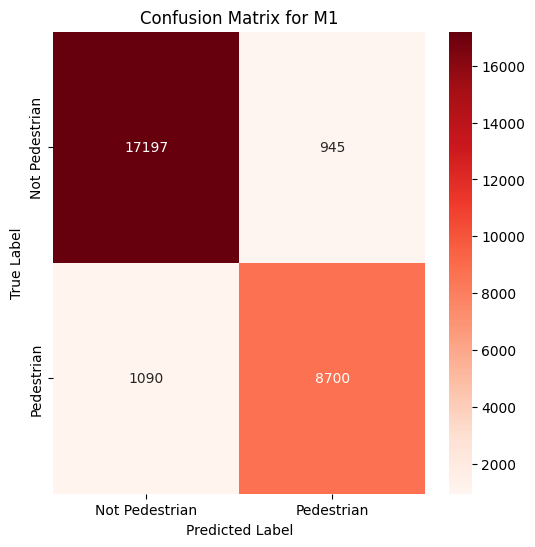

In [13]:
cm3 = confusion_matrix(y, m3)
# Define the class labels
class_labels = ["Not Pedestrian", "Pedestrian"]

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm3, annot=True, fmt="d", cmap="Reds", xticklabels=class_labels, yticklabels=class_labels)

# Add labels, title, and axis ticks
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for M1")
plt.xticks(np.arange(len(class_labels)) + 0.5, class_labels)
plt.yticks(np.arange(len(class_labels)) + 0.5, class_labels)

# Show the plot
plt.show()

## M4

In [20]:
m4 = df['m4']

In [21]:
print(classification_report(y, m4))

              precision    recall  f1-score   support

  not_person       0.95      0.96      0.95     18142
      person       0.92      0.90      0.91      9790

    accuracy                           0.94     27932
   macro avg       0.93      0.93      0.93     27932
weighted avg       0.94      0.94      0.94     27932



In [22]:
report = classification_report(y, m4, output_dict=True)
print(report)

{'not_person': {'precision': 0.9472020923009862, 'recall': 0.9582184985117407, 'f1-score': 0.9526784491026168, 'support': 18142}, 'person': {'precision': 0.9208685666562272, 'recall': 0.9010214504596528, 'f1-score': 0.910836904331664, 'support': 9790}, 'accuracy': 0.9381712730917944, 'macro avg': {'precision': 0.9340353294786067, 'recall': 0.9296199744856968, 'f1-score': 0.9317576767171404, 'support': 27932}, 'weighted avg': {'precision': 0.937972348062758, 'recall': 0.9381712730917944, 'f1-score': 0.9380132363248842, 'support': 27932}}


In [ ]:
cm4 = confusion_matrix(y, m3)
# Define the class labels
class_labels = ["Not Pedestrian", "Pedestrian"]

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm4, annot=True, fmt="d", cmap="Reds", xticklabels=class_labels, yticklabels=class_labels)

# Add labels, title, and axis ticks
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for M1")
plt.xticks(np.arange(len(class_labels)) + 0.5, class_labels)
plt.yticks(np.arange(len(class_labels)) + 0.5, class_labels)

# Show the plot
plt.show()

## M5

In [23]:
m5 = df['m5']

In [24]:
print(classification_report(y, m5))

              precision    recall  f1-score   support

  not_person       0.95      0.97      0.96     18142
      person       0.94      0.91      0.92      9790

    accuracy                           0.95     27932
   macro avg       0.95      0.94      0.94     27932
weighted avg       0.95      0.95      0.95     27932



In [26]:
report = classification_report(y, m5, output_dict=True)
print(report)

{'not_person': {'precision': 0.9508436080467229, 'recall': 0.9691875206702679, 'f1-score': 0.9599279357973467, 'support': 18142}, 'person': {'precision': 0.9407838983050848, 'recall': 0.907150153217569, 'f1-score': 0.9236609464378576, 'support': 9790}, 'accuracy': 0.9474437920664471, 'macro avg': {'precision': 0.9458137531759039, 'recall': 0.9381688369439185, 'f1-score': 0.9417944411176021, 'support': 27932}, 'weighted avg': {'precision': 0.9473177395671784, 'recall': 0.9474437920664471, 'f1-score': 0.9472165715617246, 'support': 27932}}


In [ ]:
cm5 = confusion_matrix(y, m5)
# Define the class labels
class_labels = ["Not Pedestrian", "Pedestrian"]

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm5, annot=True, fmt="d", cmap="Reds", xticklabels=class_labels, yticklabels=class_labels)

# Add labels, title, and axis ticks
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for M1")
plt.xticks(np.arange(len(class_labels)) + 0.5, class_labels)
plt.yticks(np.arange(len(class_labels)) + 0.5, class_labels)

# Show the plot
plt.show()

## M6

In [27]:
m6 = df['m6']

In [28]:
print(classification_report(y, m6))

              precision    recall  f1-score   support

  not_person       0.95      0.96      0.96     18142
      person       0.93      0.90      0.91      9790

    accuracy                           0.94     27932
   macro avg       0.94      0.93      0.93     27932
weighted avg       0.94      0.94      0.94     27932



In [29]:
report = classification_report(y, m6, output_dict=True)
print(report)

{'not_person': {'precision': 0.9454015229248799, 'recall': 0.9649432256642047, 'f1-score': 0.9550724242341581, 'support': 18142}, 'person': {'precision': 0.9324482209240573, 'recall': 0.8967313585291113, 'f1-score': 0.9142410830512887, 'support': 9790}, 'accuracy': 0.9410353716167836, 'macro avg': {'precision': 0.9389248719244686, 'recall': 0.930837292096658, 'f1-score': 0.9346567536427234, 'support': 27932}, 'weighted avg': {'precision': 0.9408614675551228, 'recall': 0.9410353716167836, 'f1-score': 0.9407612818104043, 'support': 27932}}


In [ ]:
cm6 = confusion_matrix(y, m6)
# Define the class labels
class_labels = ["Not Pedestrian", "Pedestrian"]

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm6, annot=True, fmt="d", cmap="Reds", xticklabels=class_labels, yticklabels=class_labels)

# Add labels, title, and axis ticks
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for M1")
plt.xticks(np.arange(len(class_labels)) + 0.5, class_labels)
plt.yticks(np.arange(len(class_labels)) + 0.5, class_labels)

# Show the plot
plt.show()

# Display Images

In [56]:
# Finding rows where Column1 is not equal to Column2
result = df[(df['m1'] == df['m3']) & (df['label'] != df['m3'])]

print(result)

   Index        x0        x1        x2        x3        x4        x5  \
1      1  0.209809 -0.195299  0.613611  0.511834  1.189655  0.393342   
3      3  0.202437 -0.188921  0.578980  0.430455  1.180157  0.347612   
5      5  0.241249 -0.184785  0.652864  0.534563  1.238607  0.412244   
7      7  0.262403 -0.182774  0.700399  0.523878  1.263578  0.429690   
9      9  0.195057 -0.211846  0.534775  0.537178  1.085993  0.374605   

         x6        x7        x8  ...  original_label  \
1 -0.076997  0.543957  0.709552  ...         spatula   
3 -0.034450  0.569040  0.682533  ...         spatula   
5 -0.014046  0.589741  0.821258  ...         spatula   
7 -0.000219  0.604236  0.830435  ...         spatula   
9 -0.071791  0.513848  0.738117  ...         spatula   

                                            img_path  \
1  ../../data/val/YFCC100M/v_9c29a4c4e03790d16925...   
3  ../../data/val/YFCC100M/v_9c29a4c4e03790d16925...   
5  ../../data/val/YFCC100M/v_9c29a4c4e03790d16925...   
7  ../

In [62]:
sample = result[0:1]
sample

,Index,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,original_label,img_path,metadata,bboxs,m1,m2,m3,m4,m5,m6
1,1,0.209809,-0.195299,0.613611,0.511834,1.189655,0.393342,-0.076997,0.543957,0.709552,...,spatula,../../data/val/YFCC100M/v_9c29a4c4e03790d16925...,"{'segmentation': [[254, 187, 277, 187, 277, 42...","(254.0, 187.0, 277.0, 423.0)",person,person,person,person,person,person


In [75]:
image_path = '../'+sample['img_path'].item()
print(image_path)

../../../data/val/YFCC100M/v_9c29a4c4e03790d16925f984e838e4a/frame0126.jpg


In [87]:
pil_bbox = sample['bboxs'].item()
print((pil_bbox))

(254.0, 187.0, 277.0, 423.0)


In [88]:
elements = pil_bbox.strip("()").split(", ")

# Step 2: Convert each element to an integer
pil_bbox = tuple(int(float(element)) for element in elements)
print((pil_bbox))

(254, 187, 277, 423)


In [91]:
label = sample['label'].item()
print(label)

not_person


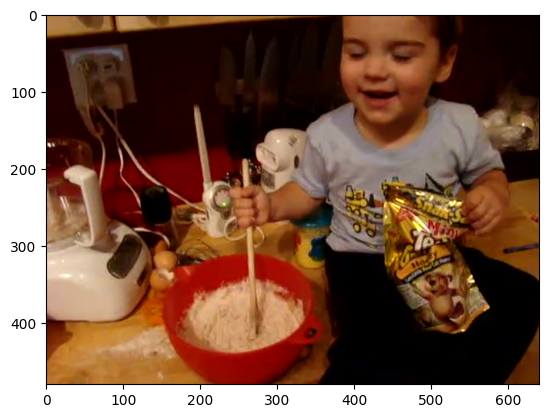

In [94]:
from PIL import Image, ImageDraw,ImageFont
%matplotlib inline

fontsize = 30
font = ImageFont.truetype("arial.ttf", fontsize)

image = Image.open(image_path)
roi = image.crop(pil_bbox)
draw = ImageDraw.Draw(roi)
draw.text((30, 30), label, fill='red')
plt.imshow(image)

C:\Users\monic\AppData\Local\Temp\ipykernel_24448\898541380.py:13: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(label, font=font)


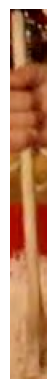

In [95]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

fontsize = 12
font = ImageFont.truetype("arial.ttf", fontsize)

image = Image.open(image_path)
roi = image.crop(pil_bbox)
draw = ImageDraw.Draw(roi)

# Calculate text size and position
label = "M9: Not Person"
text_width, text_height = draw.textsize(label, font=font)
text_x = 5
text_y = 14

# Calculate background rectangle size
padding = 5
bg_width = text_width + 2 * padding
bg_height = text_height + 2 * padding

# Draw white background rectangle
# draw.rectangle([(text_x - padding, text_y - padding), (text_x + bg_width, text_y + bg_height)], fill='white')

# Draw the text on the image with a red color
# draw.text((text_x, text_y), label, fill='red', font=font)

# Show the image
plt.imshow(roi)
plt.axis('off')
plt.show()
